Installing necessary python libraries

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


Language pack for Croatian

In [1]:
python -m spacy download hr_core_news_lg

SyntaxError: invalid syntax (1330120807.py, line 1)

Extracting entities and visualising them

In [11]:
import matplotlib.pyplot as plt
import spacy

nlp = spacy.load("hr_core_news_lg")

def extract_entities(text):
    doc = nlp(text)
    entities = {
        'ORG': [], 'MISC': [], 'PER': [], 'DERIV_PER': [], 'LOC': []
    }
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            entities['ORG'].append(ent.text)
        elif ent.label_ == 'MISC':
            entities['MISC'].append(ent.text)
        elif ent.label_ == 'PER':
            entities['PER'].append(ent.text)
        elif ent.label_ == 'DERIV_PER':
            entities['DERIV_PER'].append(ent.text)
        elif ent.label_ == 'LOC':
            entities['LOC'].append(ent.text)
    return entities

def visualize_top_entities(entity_counts, entity_type):
    if not entity_counts:
        print(f"No {entity_type} entities found.")
        return
    
    top_entities = entity_counts.most_common(5)
    if not top_entities:
        print(f"No top 5 entities for {entity_type} found.")
        return
    
    labels, values = zip(*top_entities)
    
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values, color='skyblue')
    plt.title(f"Top 5 {entity_type} Entities Frequencies Across Articles", fontsize=16)
    plt.xlabel(f"{entity_type} Name", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()
    
    plt.show()



def print_most_common_entities(entity_counts, entity_type):
    if not entity_counts:
        print(f"No {entity_type} entities found.")
        return

    print(f"\nMost common {entity_type} entities:")
    for entity, count in entity_counts.most_common(5):  
        print(f"{entity}: {count} occurrences")

Installing feedparser and parsing rss feed. Index.hr RSS feed was used for this project

In [ ]:
pip install feedparser

In [7]:
import feedparser

def parse_rss(rss_url, keyword):
    feed = feedparser.parse(rss_url)

    articles = []
    for entry in feed.entries:
        title = entry.title
        link = entry.link
        summary = entry.summary
        if keyword in title.lower():
            articles.append((title,link, summary))
    return articles
            

In [12]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


Scraping articles. In console it is possible to track progress and to see which article is being scraped and its content.

Fetching articles...
Scraping: Červar objavio knjigu. Balić: On nas je povezao, napravio tim
Full Content:
 ZNANOST nije rukomet, ali znanost može pomoći rukometu, rekao je u ponedjeljak u Umagu proslavljeni rukometni trener i bivši izbornik Hrvatske rukometne reprezentacije Lino Červar na predstavljanju svoje knjige Rukomet - put do vrha i tajne uspjeha u izdanju Školske knjige. Na pisanje knjige potaknulo ga je, ističe Červar, općenito stanje trenerske struke u Hrvatskoj, ali i 20. obljetnica hrvatskog svjetskog i olimpijskog zlata."Zlatna hrvatska rukometna generacija svjetskih prvaka 2003. i olimpijskih pobjednika 2004. godine posijala je sjeme za novi smjer rukometne igre. Danas se sve češće vidi realizacija tog poimanja rukometne igre koju kreativnu uspješnost i izvedbu temelji na umu i karakteru igrača", rekao je Lino Červar. Upravo u ovoj knjizi, naglasio je,  "opisuje kako su hrvatski rukometaši došli do takvog načina igranja i kako on vidi rukometnu budućnost."Posebna pozorno

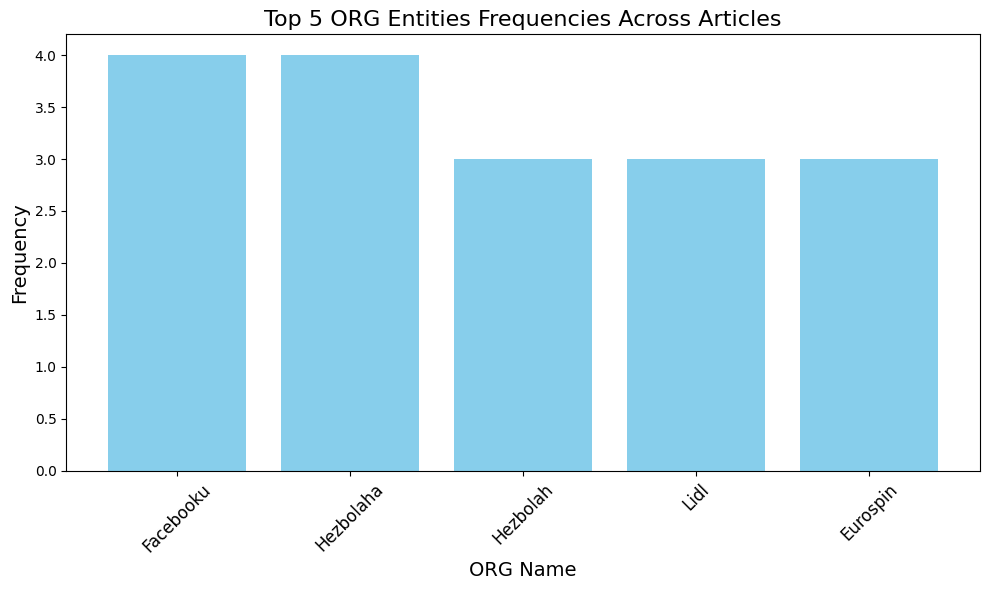


Most common ORG entities:
Facebooku: 4 occurrences
Hezbolaha: 4 occurrences
Hezbolah: 3 occurrences
Lidl: 3 occurrences
Eurospin: 3 occurrences


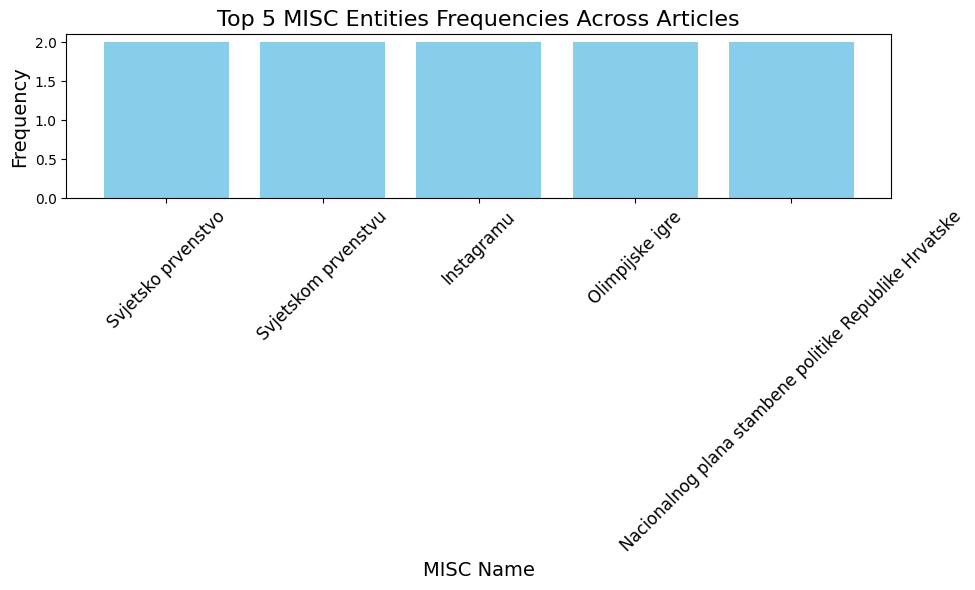


Most common MISC entities:
Svjetsko prvenstvo: 2 occurrences
Svjetskom prvenstvu: 2 occurrences
Instagramu: 2 occurrences
Olimpijske igre: 2 occurrences
Nacionalnog plana stambene politike Republike Hrvatske: 2 occurrences


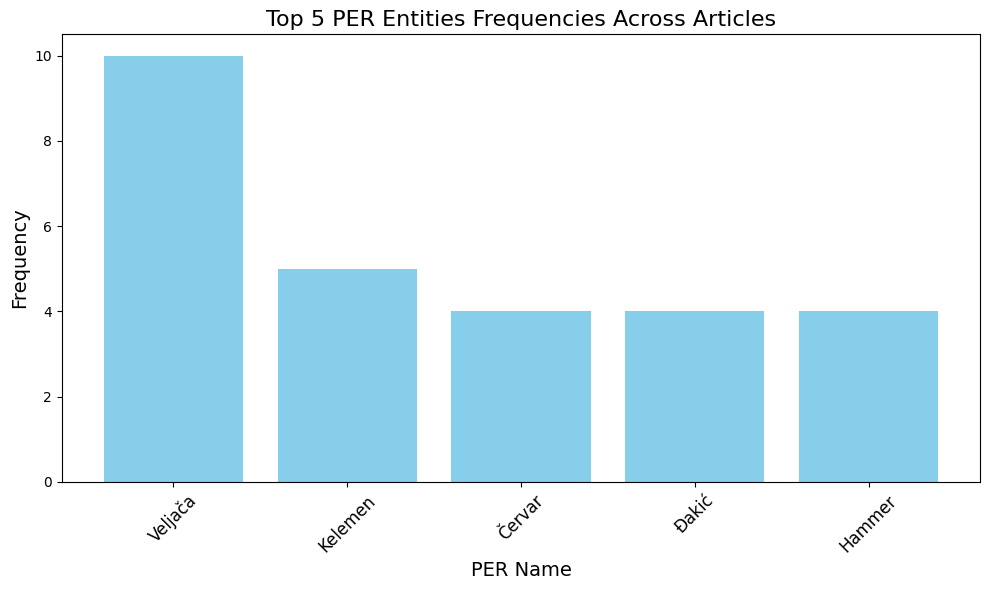


Most common PER entities:
Veljača: 10 occurrences
Kelemen: 5 occurrences
Červar: 4 occurrences
Đakić: 4 occurrences
Hammer: 4 occurrences


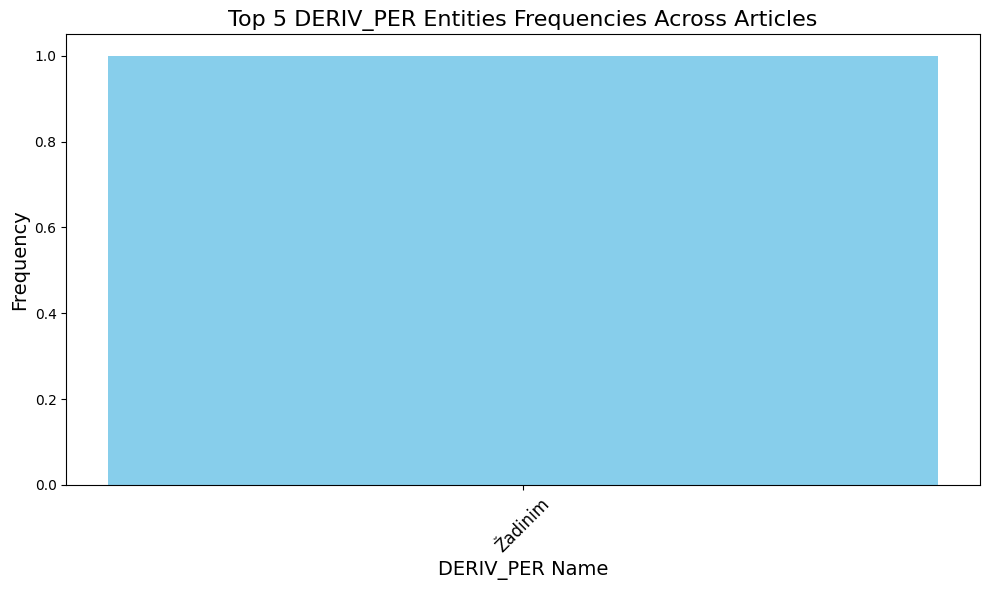


Most common DERIV_PER entities:
Žadinim: 1 occurrences


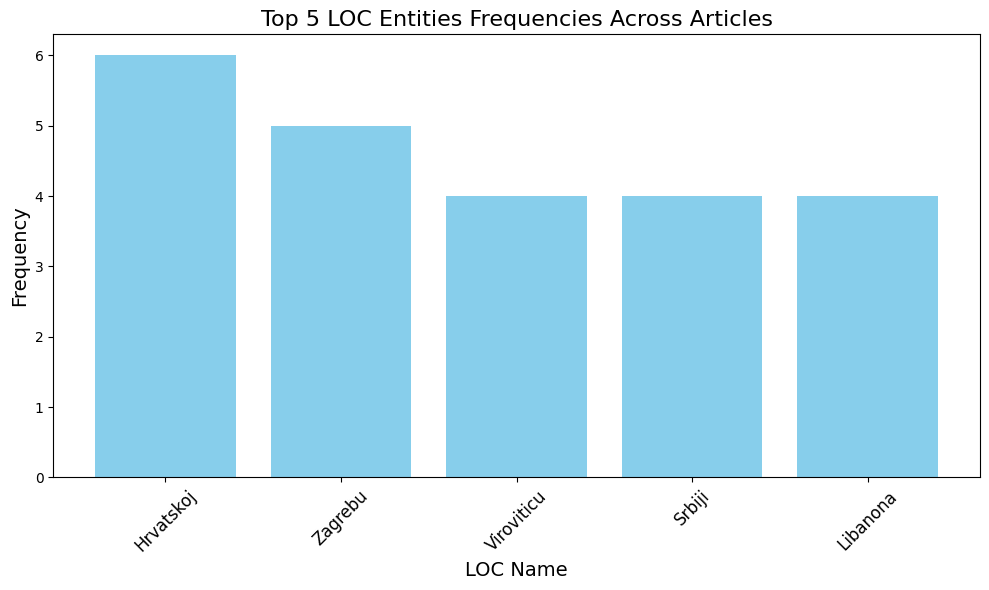


Most common LOC entities:
Hrvatskoj: 6 occurrences
Zagrebu: 5 occurrences
Viroviticu: 4 occurrences
Srbiji: 4 occurrences
Libanona: 4 occurrences


In [8]:
import requests
import time
from bs4 import BeautifulSoup
from collections import Counter


def scrape_article(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        text_holder = soup.find('div', class_='text-holder')
        if text_holder:
            article_content = text_holder.find('div')
            if article_content:
                return article_content.get_text(strip=True)
        return 'Content not found'
    except Exception as e:
        return f"Error during scraping: {e}"


def main():
    rss_url = 'https://www.index.hr/rss'
    keyword = 'ba'

    print("Fetching articles...")
    articles = parse_rss(rss_url, keyword)

    all_entities = {
        'ORG': [], 'MISC': [], 'PER': [], 'DERIV_PER': [], 'LOC': []
    } 

    for title, link, summary in articles:
        print(f"Scraping: {title}")
        content = scrape_article(link)
        print("Full Content:\n", content)

        print("\nExtracting Entities...")
        entities = extract_entities(content if content else "")
        
        for entity_type in all_entities:
            all_entities[entity_type].extend(entities[entity_type])

        print(f"Entities Found (ORG): {Counter(entities['ORG'])}")
        print(f"Entities Found (MISC): {Counter(entities['MISC'])}")
        print(f"Entities Found (PER): {Counter(entities['PER'])}")
        print(f"Entities Found (DERIV_PER): {Counter(entities['DERIV_PER'])}")
        print(f"Entities Found (LOC): {Counter(entities['LOC'])}")
        print("-" * 80)
        time.sleep(5)  

    for entity_type, entity_list in all_entities.items():
        entity_counts = Counter(entity_list)     
        
        visualize_top_entities(entity_counts, entity_type)

        print_most_common_entities(entity_counts, entity_type)

if __name__ == "__main__":
    main()


I combined files from different days (for specific categories) into one and summed all the same entities in that file using the following code.

In [ ]:
import re

input_file_path = 'merged_per_entities.txt'
output_file_path = 'sorted_per_entity_counts.txt' 

entity_counts = {}

with open(input_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        match = re.match(r'(.+): (\d+)', line)
        if match:
            entity = match.group(1).strip()
            count = int(match.group(2))
            
            if entity in entity_counts:
                entity_counts[entity] += count
            else:
                entity_counts[entity] = count

sorted_entity_counts = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)

with open(output_file_path, 'w', encoding='utf-8') as output_file:
    for entity, count in sorted_entity_counts:
        output_file.write(f"{entity}: {count}\n")
